In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from cnn_utils import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the SIGNS dataset
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = load_dataset()

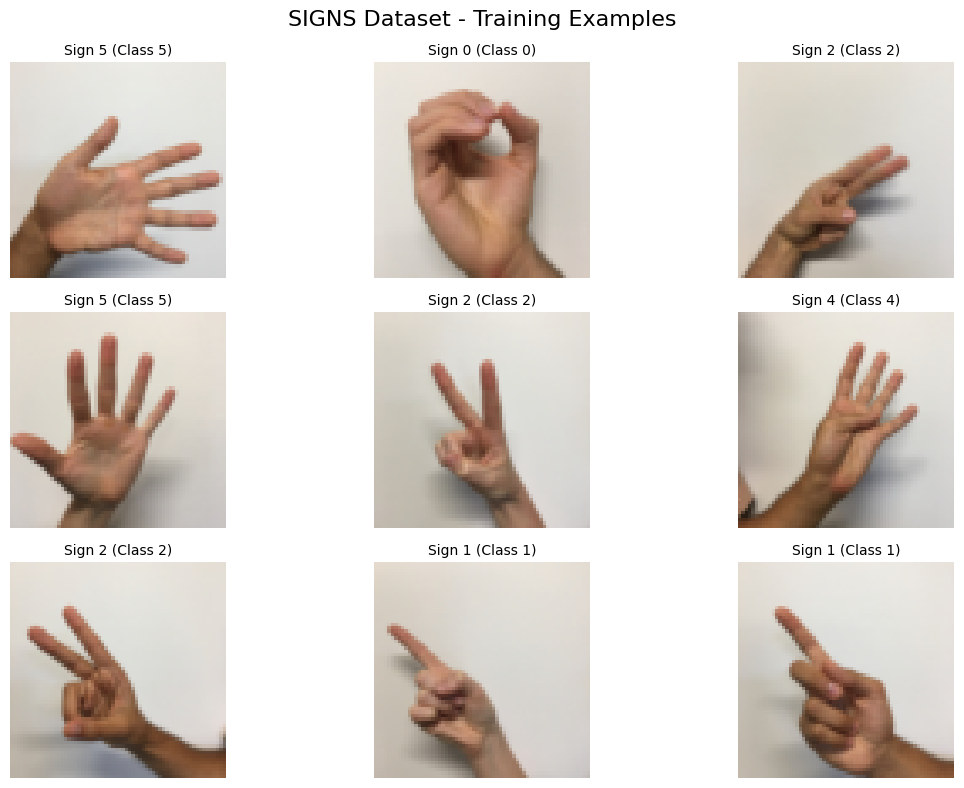


📊 Dataset Statistics:
Training examples: 1080
Image size: 64x64 pixels
Number of classes: 6
Classes: [0 1 2 3 4 5]

📈 Class distribution:
  Sign 0: 180 examples
  Sign 1: 180 examples
  Sign 2: 180 examples
  Sign 3: 180 examples
  Sign 4: 180 examples
  Sign 5: 180 examples


In [13]:
# Visualize some training examples
# Define meaningful names for the hand signs
sign_names = {
    0: "Sign 0", 
    1: "Sign 1", 
    2: "Sign 2", 
    3: "Sign 3", 
    4: "Sign 4", 
    5: "Sign 5"
}

plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train_orig[i])
    # Fix: Use Y_train_orig[0, i] to get the label for image i
    label = Y_train_orig[0, i]
    plt.title(f'{sign_names[label]} (Class {label})', fontsize=10)
    plt.axis('off')

plt.suptitle('SIGNS Dataset - Training Examples', fontsize=16)
plt.tight_layout()
plt.show()

# Show dataset statistics
print(f"\n📊 Dataset Statistics:")
print(f"Training examples: {X_train_orig.shape[0]}")
print(f"Image size: {X_train_orig.shape[1]}x{X_train_orig.shape[2]} pixels")
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Show distribution of classes
unique, counts = np.unique(Y_train_orig, return_counts=True)
print(f"\n📈 Class distribution:")
for class_id, count in zip(unique, counts):
    print(f"  {sign_names[class_id]}: {count} examples")


In [8]:
# Check the shapes and structure of the data
print("Data shapes:")
print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"Y_train_orig shape: {Y_train_orig.shape}")
print(f"classes shape: {classes.shape}")
print(f"classes: {classes}")
print(f"\nFirst few labels:")
print(f"Y_train_orig[:, :5]: {Y_train_orig[:, :5]}")
print(f"Y_train_orig[0, :5]: {Y_train_orig[0, :5]}")
print(f"\nSample label values:")
for i in range(5):
    label_value = Y_train_orig[0, i]
    print(f"Image {i}: label = {label_value}, class = {classes[label_value]}")

Data shapes:
X_train_orig shape: (1080, 64, 64, 3)
Y_train_orig shape: (1, 1080)
classes shape: (6,)
classes: [0 1 2 3 4 5]

First few labels:
Y_train_orig[:, :5]: [[5 0 2 5 2]]
Y_train_orig[0, :5]: [5 0 2 5 2]

Sample label values:
Image 0: label = 5, class = 5
Image 1: label = 0, class = 0
Image 2: label = 2, class = 2
Image 3: label = 5, class = 5
Image 4: label = 2, class = 2


In [14]:
# Normalize pixel values
X_train = X_train_orig / 255.0
X_test = X_test_orig / 255.0

In [28]:
# Convert labels to one-hot encoding
# First flatten the labels to remove the extra dimension
Y_train_flat = Y_train_orig.flatten()  # Shape: (1080,)
Y_test_flat = Y_test_orig.flatten()    # Shape: (120,)

# Then apply one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train_flat, num_classes=len(classes))
Y_test = tf.keras.utils.to_categorical(Y_test_flat, num_classes=len(classes))

print(f"After fixing:")
print(f"Y_train shape: {Y_train.shape}")  # Should be (1080, 6)
print(f"Y_test shape: {Y_test.shape}")    # Should be (120, 6)

After fixing:
Y_train shape: (1080, 6)
Y_test shape: (120, 6)


In [29]:
# No need for transpose operations anymore since we fixed the shapes above
print(f"Final shapes:")
print(f"X_train: {X_train.shape}")  # Should be (1080, 64, 64, 3)
print(f"Y_train: {Y_train.shape}")  # Should be (1080, 6)
print(f"X_test: {X_test.shape}")    # Should be (120, 64, 64, 3)
print(f"Y_test: {Y_test.shape}")    # Should be (120, 6)

Final shapes:
X_train: (1080, 64, 64, 3)
Y_train: (1080, 6)
X_test: (120, 64, 64, 3)
Y_test: (120, 6)


In [19]:
#Build the CNN model
model = Sequential([
    Conv2D(filters=8,kernel_size=(4,4),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(8,8)),
    Conv2D(filters=16,kernel_size=(4,4),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=6,activation='softmax')
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(
    X_train, Y_train,
    epochs=100,
    validation_data=(X_test, Y_test),
    batch_size=32,
    verbose=1
)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6768 - loss: 0.9943 - val_accuracy: 0.6083 - val_loss: 1.0443
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6768 - loss: 0.9943 - val_accuracy: 0.6083 - val_loss: 1.0443
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6551 - loss: 1.0160 - val_accuracy: 0.6333 - val_loss: 1.0110
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6551 - loss: 1.0160 - val_accuracy: 0.6333 - val_loss: 1.0110
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.9549 - val_accuracy: 0.6417 - val_loss: 0.9883
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.9549 - val_accuracy: 0.6417 - val_loss: 0.9883
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7059 - loss: 0.8958 - val_accuracy: 0.5833 - val_loss: 0.9703
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7059 - loss: 0.8958 - val_accuracy: 0.5833 - v

C:\Users\Dell\AppData\Local\Temp\ipykernel_24156\1496747212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_24156\1496747212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

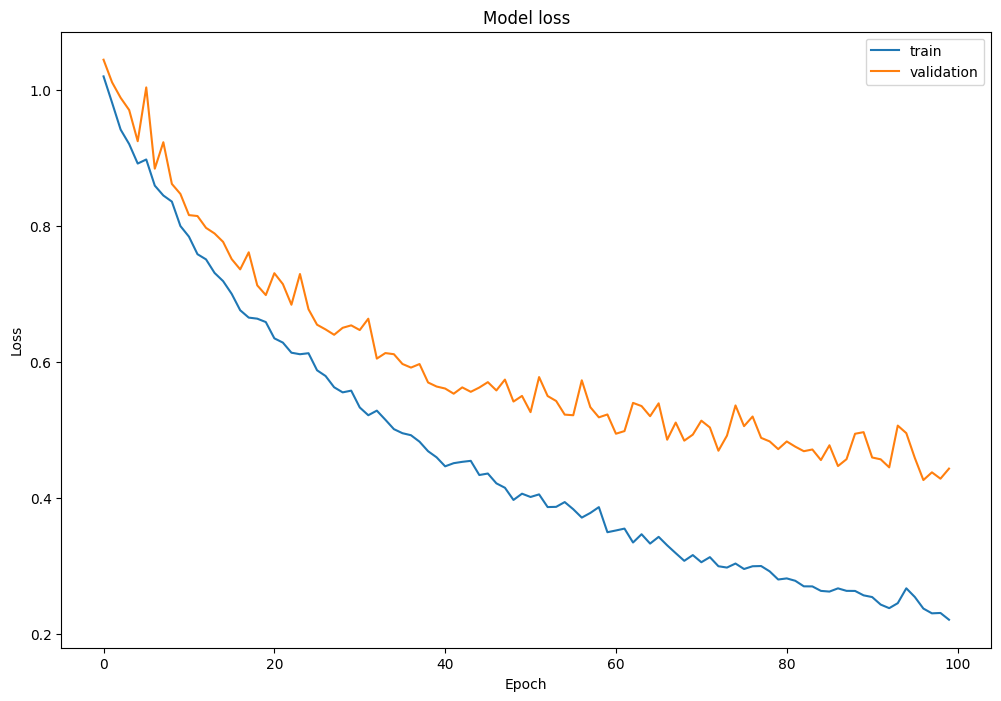

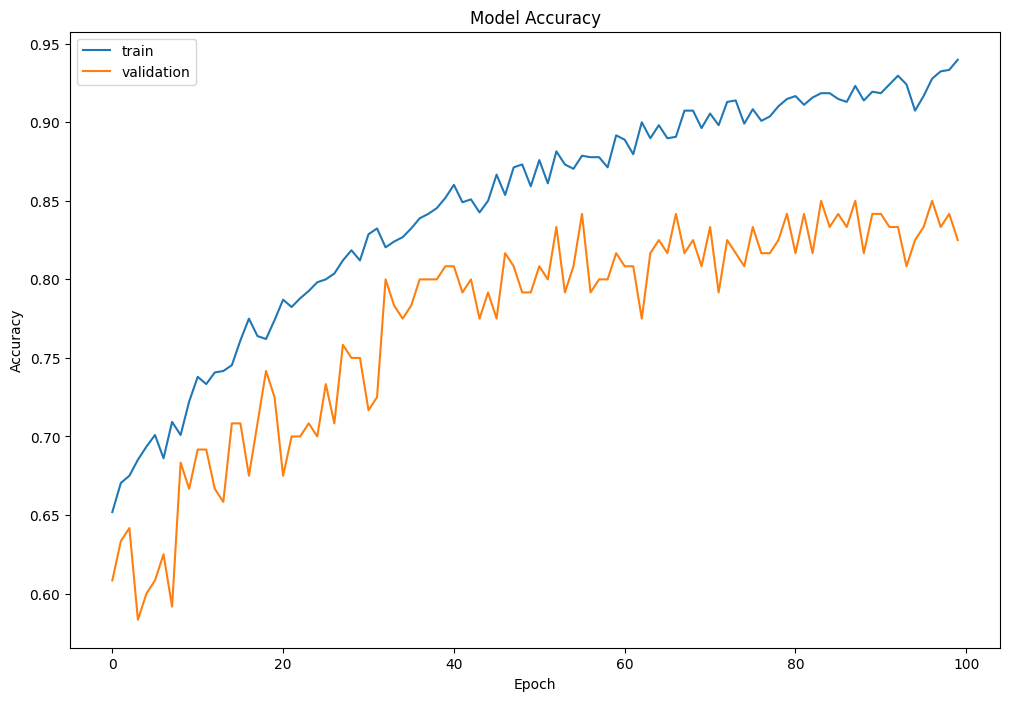

In [34]:
import pandas as pd
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')